<a href="https://colab.research.google.com/github/AslauAlexandru/Week-2-Headstarter-Accelerator-Bonus-Project-Credit-Card-Fraud-Detection-with-ML/blob/main/Week_2_Headstarter_Accelerator_Bonus_Project_Credit_Card_Fraud_Detection_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bonus Project: Credit Card Fraud Detection with ML

In this project, your task is to build an ML model to determine whether or not a credit card transaction is fraudulent or not.

In [1]:
#!pip install pennylane

In [2]:
#Link to dataset: https://www.kaggle.com/datasets/kartik2112/fraud-detection/data

!kaggle datasets download kartik2112/fraud-detection
!unzip /content/fraud-detection.zip
!rm /content/fraud-detection.zip

Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
 92% 185M/202M [00:01<00:00, 169MB/s]
100% 202M/202M [00:01<00:00, 136MB/s]
Archive:  /content/fraud-detection.zip
  inflating: fraudTest.csv           
  inflating: fraudTrain.csv          


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Credit Card Fraud Detection with ML

In [4]:
#df=pd.read_csv('/content/fraudTrain.csv')[:30000]

#df_train=pd.read_csv('/content/fraudTrain.csv')[:30000]
#df_test=pd.read_csv('/content/fraudTest.csv')[:20000]

#df=pd.concat([df_train,df_test])

df=pd.read_csv('/content/fraudTrain.csv')[:30000]
#df=df[:30000]
df=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2019-01-18 19:44:22,3525590521269779,fraud_Kilback Group,food_dining,4.80,Scott,Fuller,M,861 Karen Common,Haw River,...,36.0424,-79.3242,6006,Paramedic,1984-07-20,fb5c2417af85647d8928a78af5efa1dc,1326915862,36.440097,-79.589525,0
29996,2019-01-18 19:44:41,376445266762684,fraud_Bernier and Sons,kids_pets,2.01,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,41.1558,-101.1360,1789,Insurance broker,1982-02-11,3afa4f9307efaa3d65237ed85b67e949,1326915881,40.312965,-101.664355,0
29997,2019-01-18 19:46:12,630424987505,fraud_Greenholt Ltd,health_fitness,36.52,Jennifer,Black,F,2870 Bean Terrace Apt. 756,Thomas,...,39.1505,-79.5030,836,Forensic psychologist,1981-08-29,1526978a0a70cd72ed589fabe4172806,1326915972,39.313899,-80.038231,0
29998,2019-01-18 19:50:27,3567527758368741,"fraud_Hagenes, Kohler and Hoppe",food_dining,118.50,Amanda,Vance,F,14601 Downs Skyway Apt. 440,Sterling City,...,31.8351,-101.0017,1143,"Scientist, biomedical",1962-03-19,dbb9624b68795a70e5242c7f850b528c,1326916227,31.497897,-101.595871,0


In [6]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  30000 non-null  object 
 1   cc_num                 30000 non-null  int64  
 2   merchant               30000 non-null  object 
 3   category               30000 non-null  object 
 4   amt                    30000 non-null  float64
 5   first                  30000 non-null  object 
 6   last                   30000 non-null  object 
 7   gender                 30000 non-null  object 
 8   street                 30000 non-null  object 
 9   city                   30000 non-null  object 
 10  state                  30000 non-null  object 
 11  zip                    30000 non-null  int64  
 12  lat                    30000 non-null  float64
 13  long                   30000 non-null  float64
 14  city_pop               30000 non-null  int64  
 15  jo

In [8]:
#df.describe() #df.describe().applymap(lambda x: format(x, 'f')) #Suggested Changes
df.describe().applymap(lambda x: format(x, 'f'))

<ipython-input-8-44b8e6005b40>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.describe().applymap(lambda x: format(x, 'f'))


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,416615835327886336.000000,71.947015,48745.807567,38.537127,-90.238226,88927.903967,1326143312.739633,38.536646,-90.240073,0.009600
std,1308637226683862272.000000,149.287420,27006.229119,5.096194,13.918812,296366.128695,435629.580681,5.125838,13.937703,0.097510
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.040141,-166.629875,0.000000
25%,180042946491150.000000,9.700000,25526.000000,34.690200,-96.809400,743.000000,1325800859.000000,34.787905,-96.975009,0.000000
50%,3519232971341141.000000,48.000000,48088.000000,39.346500,-87.476900,2471.000000,1326118926.000000,39.349811,-87.430143,0.000000
75%,4642255475285942.000000,83.762500,72042.000000,41.846700,-80.124800,20478.000000,1326534876.000000,41.920227,-80.153630,0.000000
max,4992346398065154048.000000,11872.210000,99783.000000,65.689900,-67.950300,2906700.000000,1326916316.000000,66.659242,-66.967742,1.000000


In [9]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(12,10))
#sns.heatmap(df.corr(),annot=True)

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Fraud is_fraud column')

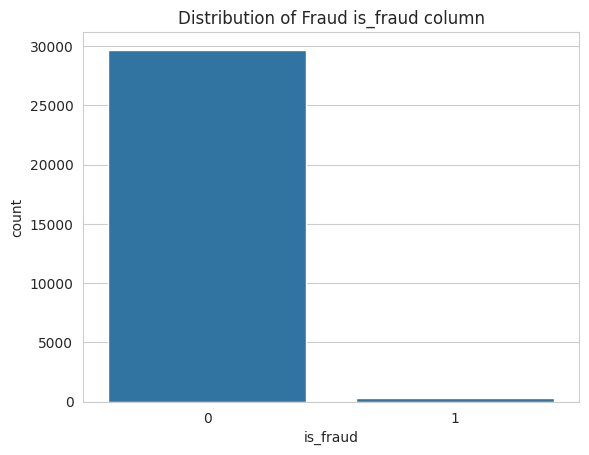

In [10]:
sns.countplot(x='is_fraud',data=df)
plt.title('Distribution of Fraud is_fraud column')

Text(0.5, 1.0, 'Amount (amt) Distribution')

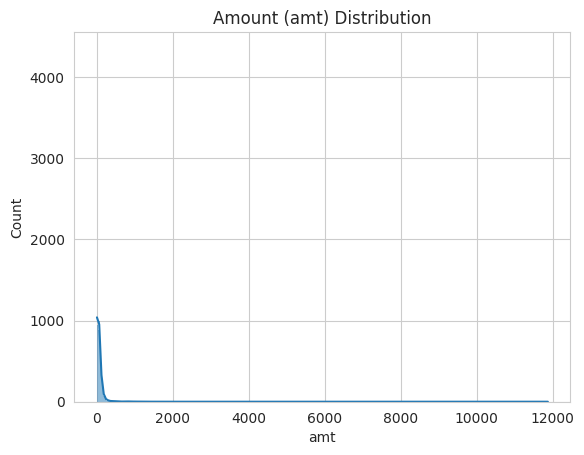

In [11]:
sns.histplot(x='amt',data=df, kde=True)
plt.title('Amount (amt) Distribution')

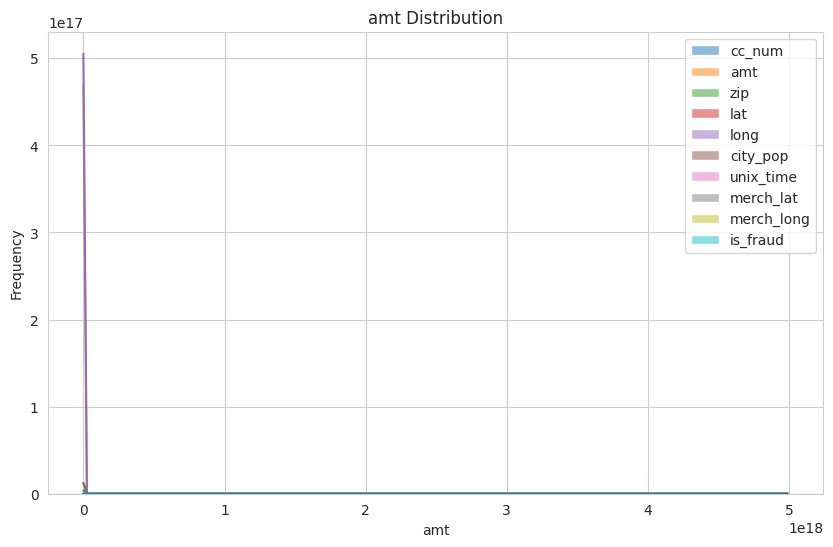

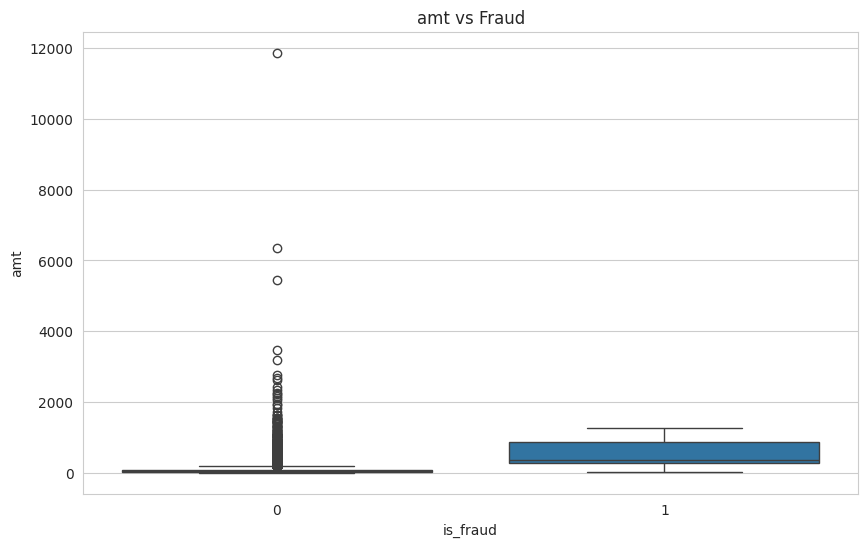

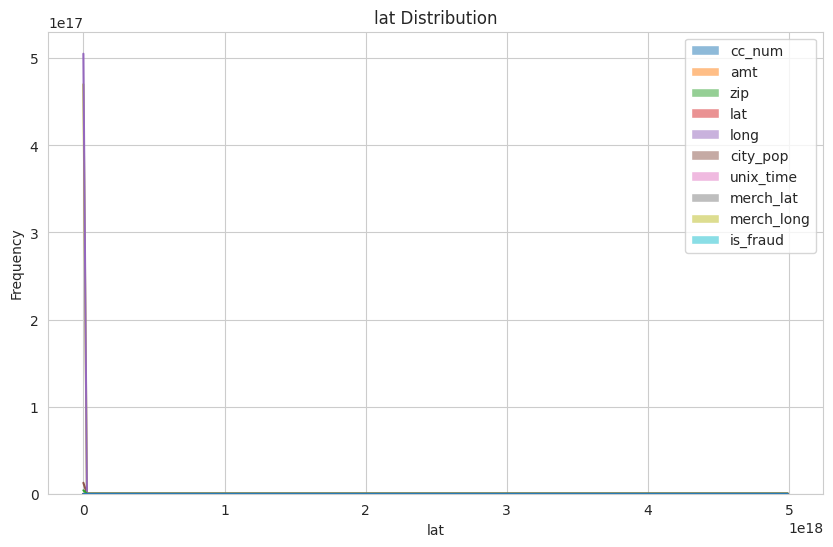

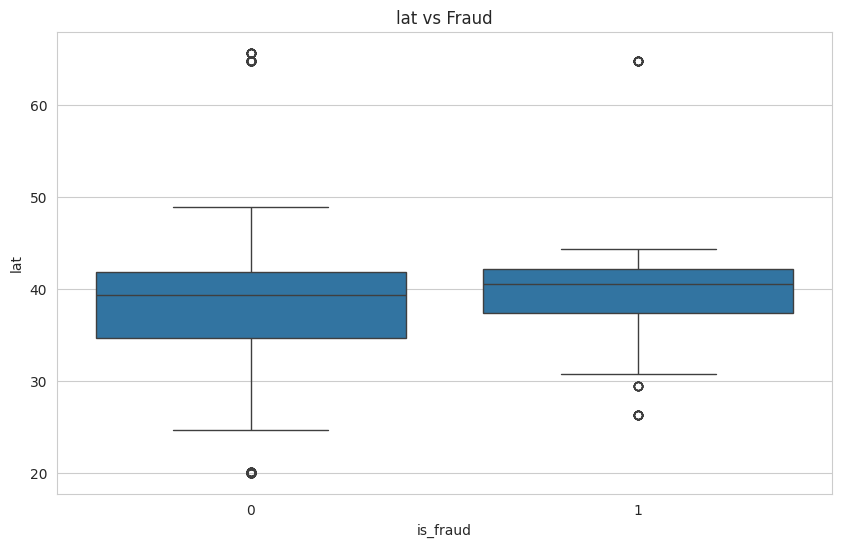

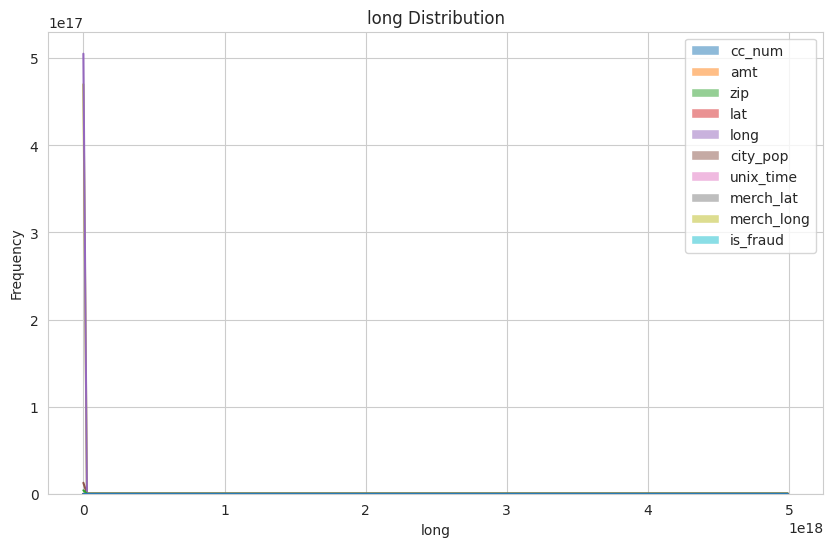

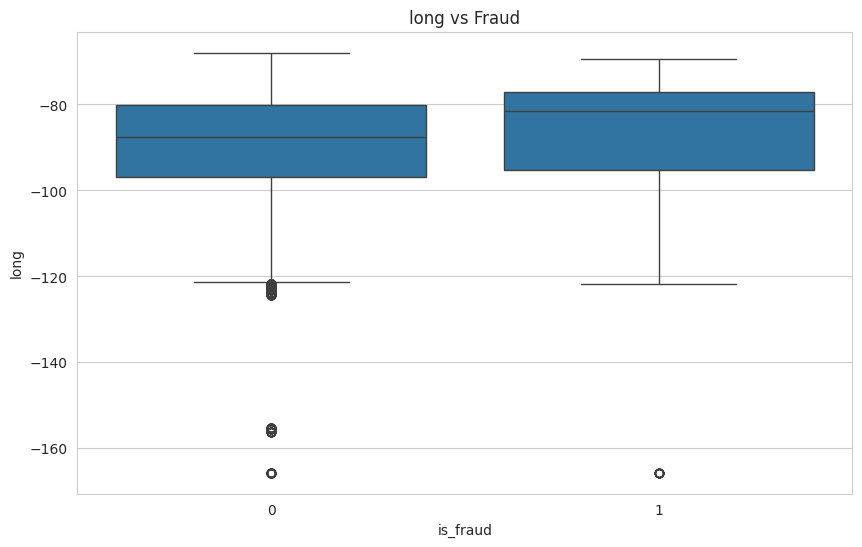

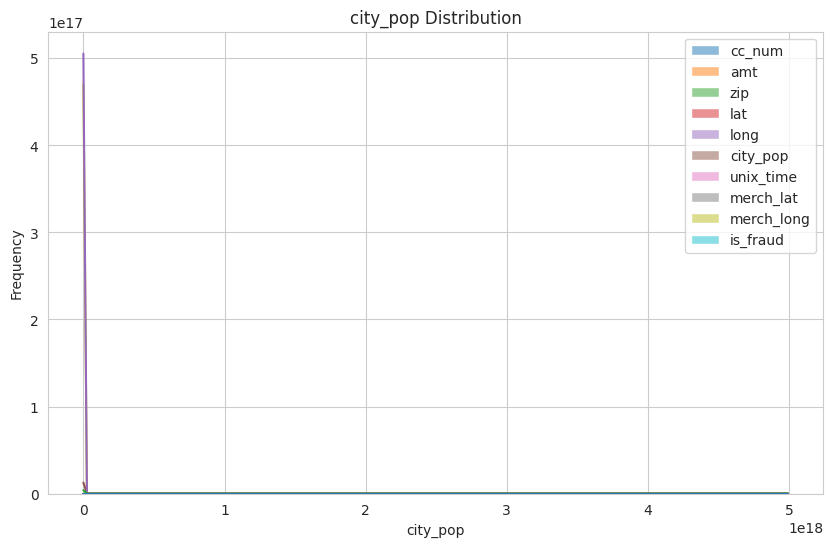

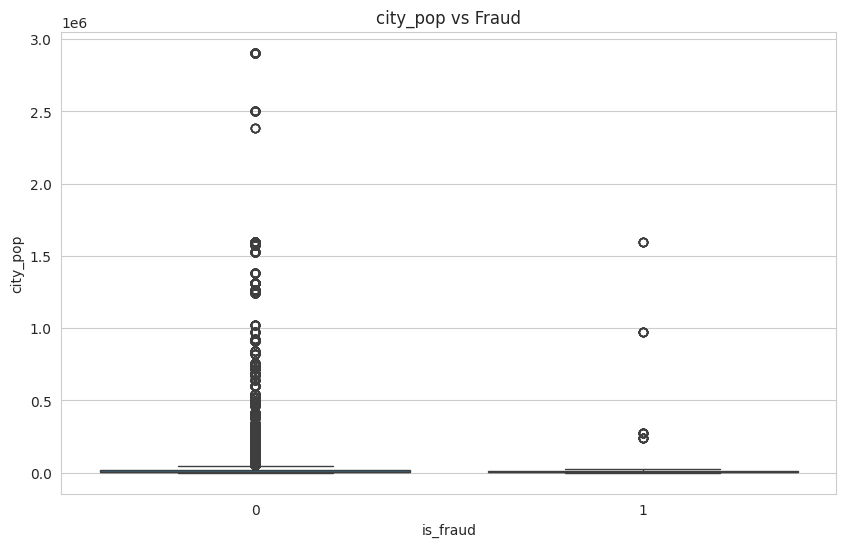

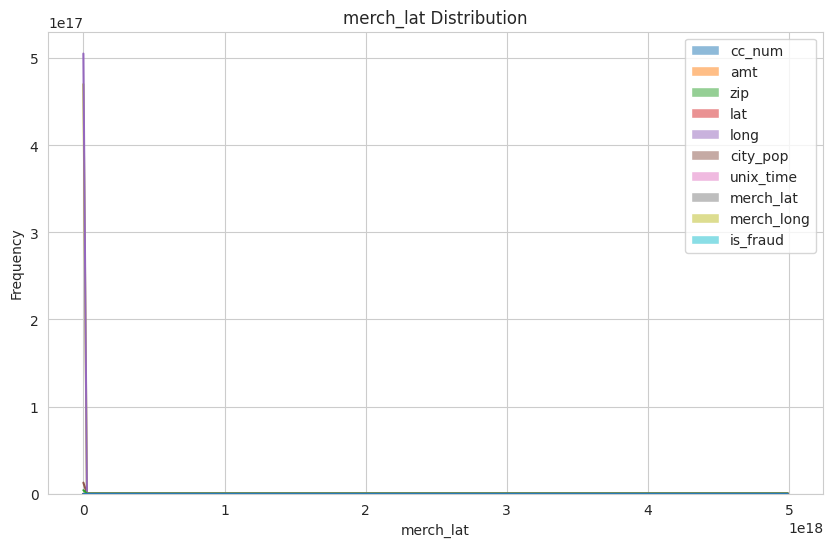

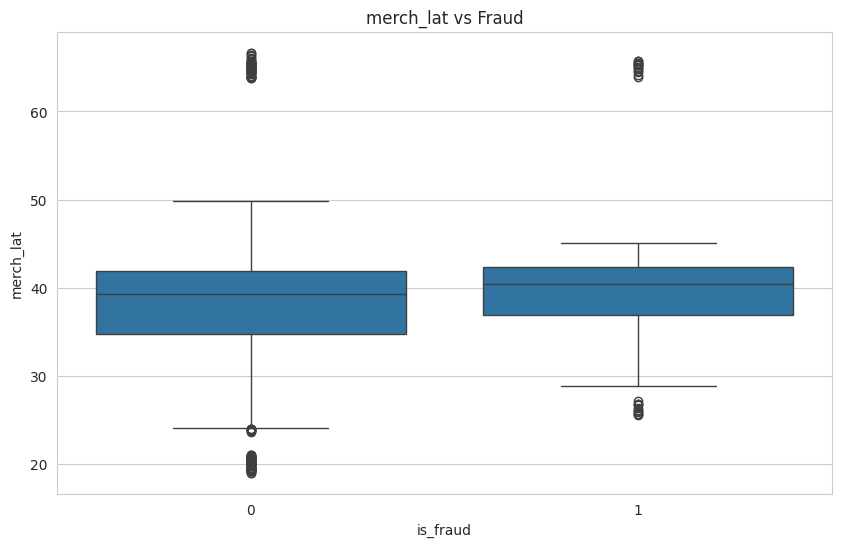

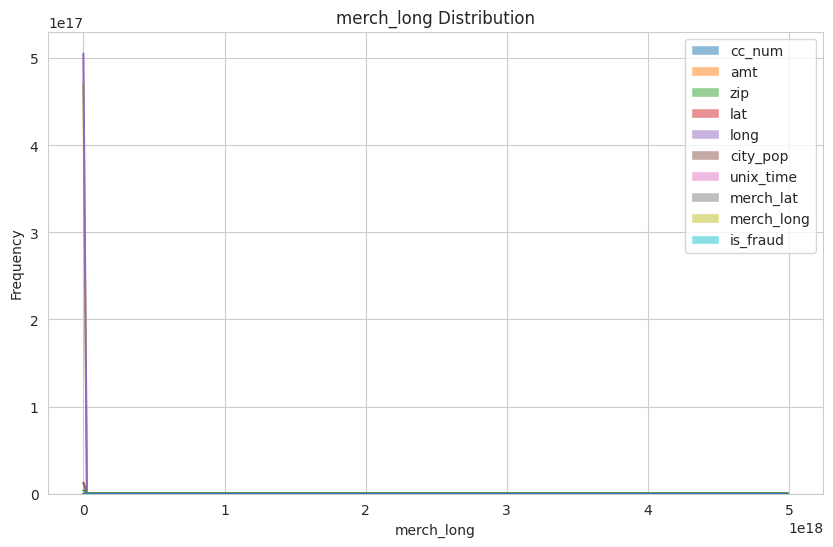

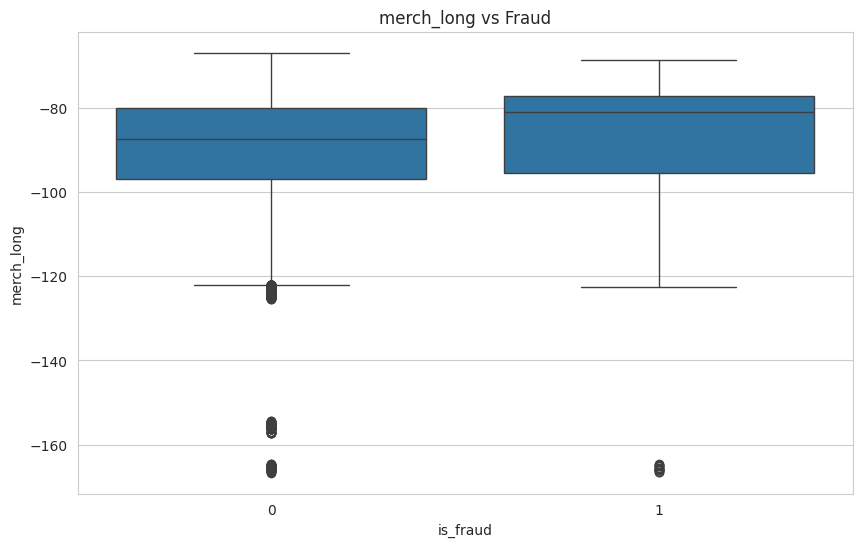

In [12]:
numeric_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df, bins=100, kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


    plt.figure(figsize=(10, 6))
    sns.boxplot(x='is_fraud', y=col, data=df)
    plt.title(f'{col} vs Fraud')
    plt.show()

Text(0.5, 1.0, 'Transaction Amount (amt) vs City Population (city_pop) and Fraud (is_fraud) ')

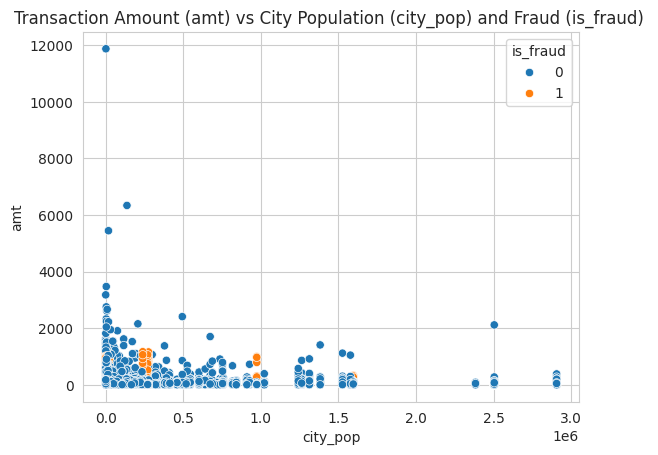

In [13]:
sns.scatterplot(data=df, x='city_pop',y='amt',hue='is_fraud')
plt.title('Transaction Amount (amt) vs City Population (city_pop) and Fraud (is_fraud) ')

Text(0.5, 1.0, 'Amount (amt) Distribution by Fraud (is_fraud)')

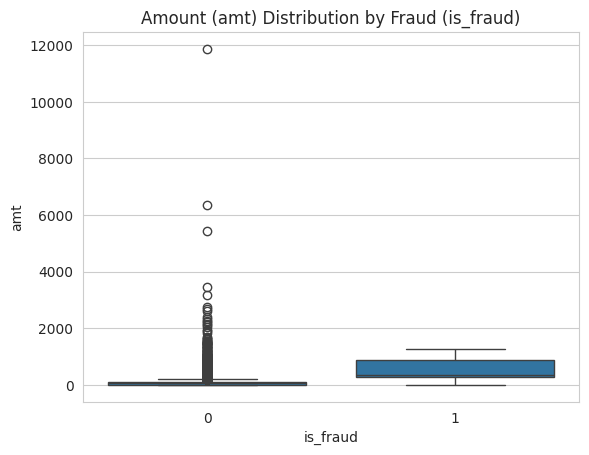

In [14]:
sns.boxplot(data=df, x='is_fraud',y='amt')
plt.title('Amount (amt) Distribution by Fraud (is_fraud)')

Text(0.5, 1.0, 'Fraud (is_fraud) Distribution by Latitude (lat)')

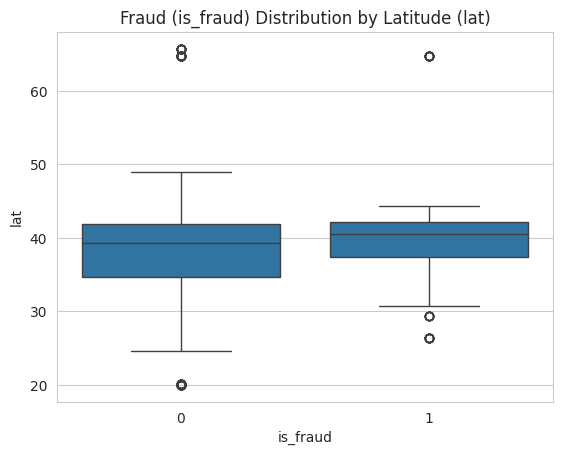

In [15]:
sns.boxplot(data=df, x='is_fraud',y='lat')
plt.title('Fraud (is_fraud) Distribution by Latitude (lat)')


Text(0.5, 1.0, 'Fraud (is_fraud) Distribution by Longitude (long)')

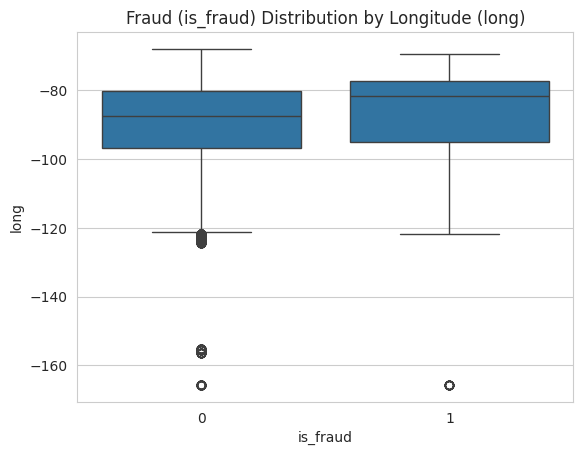

In [16]:
sns.boxplot(data=df, x='is_fraud',y='long')
plt.title('Fraud (is_fraud) Distribution by Longitude (long)')

Text(0.5, 1.0, 'Fraud (is_fraud) Distribution by Merch Latitude (merch_lat)')

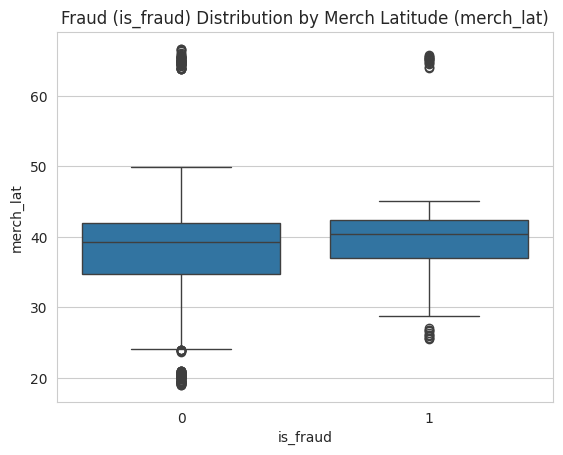

In [17]:
sns.boxplot(data=df, x='is_fraud',y='merch_lat')
plt.title('Fraud (is_fraud) Distribution by Merch Latitude (merch_lat)')

Text(0.5, 1.0, 'Fraud (is_fraud) Distribution by Merch Longitude (merch_long)')

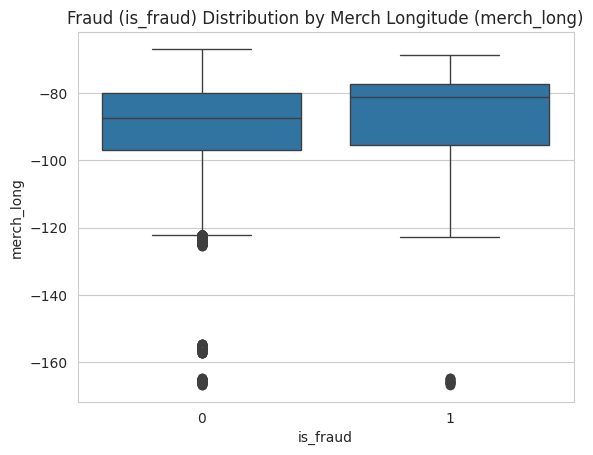

In [18]:
sns.boxplot(data=df, x='is_fraud',y='merch_long')
plt.title('Fraud (is_fraud) Distribution by Merch Longitude (merch_long)')

In [19]:
features=df.drop('is_fraud',axis=1)

In [20]:
features

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2019-01-18 19:44:22,3525590521269779,fraud_Kilback Group,food_dining,4.80,Scott,Fuller,M,861 Karen Common,Haw River,...,27258,36.0424,-79.3242,6006,Paramedic,1984-07-20,fb5c2417af85647d8928a78af5efa1dc,1326915862,36.440097,-79.589525
29996,2019-01-18 19:44:41,376445266762684,fraud_Bernier and Sons,kids_pets,2.01,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,69165,41.1558,-101.1360,1789,Insurance broker,1982-02-11,3afa4f9307efaa3d65237ed85b67e949,1326915881,40.312965,-101.664355
29997,2019-01-18 19:46:12,630424987505,fraud_Greenholt Ltd,health_fitness,36.52,Jennifer,Black,F,2870 Bean Terrace Apt. 756,Thomas,...,26292,39.1505,-79.5030,836,Forensic psychologist,1981-08-29,1526978a0a70cd72ed589fabe4172806,1326915972,39.313899,-80.038231
29998,2019-01-18 19:50:27,3567527758368741,"fraud_Hagenes, Kohler and Hoppe",food_dining,118.50,Amanda,Vance,F,14601 Downs Skyway Apt. 440,Sterling City,...,76951,31.8351,-101.0017,1143,"Scientist, biomedical",1962-03-19,dbb9624b68795a70e5242c7f850b528c,1326916227,31.497897,-101.595871


In [21]:
target=df['is_fraud']

In [22]:
target

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,0
29998,0


In [23]:
#import numpy as np

#np.argmax(target) # Use np.argmax to call the function from the NumPy library.

In [24]:
features=df.drop(['trans_date_trans_time','cc_num','merchant','category','first',
                  'last','street','city','state', 'job','dob', 'trans_num', 'is_fraud'],axis=1)

In [25]:
features=pd.get_dummies(features,columns=['gender'])

In [26]:
features

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,gender_F,gender_M
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,True,False
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,True,False
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,False,True
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,False,True
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,False,True
...,...,...,...,...,...,...,...,...,...,...
29995,4.80,27258,36.0424,-79.3242,6006,1326915862,36.440097,-79.589525,False,True
29996,2.01,69165,41.1558,-101.1360,1789,1326915881,40.312965,-101.664355,True,False
29997,36.52,26292,39.1505,-79.5030,836,1326915972,39.313899,-80.038231,True,False
29998,118.50,76951,31.8351,-101.0017,1143,1326916227,31.497897,-101.595871,True,False


In [27]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [29]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [30]:
X_train[0]

array([ 1.62644117,  0.74716485,  0.56590835, -0.65799476, -0.29805925,
        0.82023291,  0.59878543, -0.63885122,  0.917784  , -0.917784  ])

In [31]:
X_train[1]

array([-0.4090123 , -1.22809343,  0.28040051,  0.74720823, -0.29768413,
       -1.73208753,  0.10340294,  0.77799087,  0.917784  , -0.917784  ])

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#from sklearn.metrics import precision_score,recall_score,f1_score
import pickle

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [33]:
lr_model=LogisticRegression(random_state=42)

In [34]:
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [35]:
lr_predictions=lr_model.predict(X_test)

In [36]:
lr_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
lr_accuracy=accuracy_score(y_test,lr_predictions)

In [38]:
lr_accuracy

0.991

In [39]:
def evaluate_and_save_model(model,X_train,X_test,y_train,y_test, filename):
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  print(f"Accuracy: {model.__class__.__name__} Accuracy:{accuracy:.4f}")
  print(f"\nClassification_report:\n{classification_report(y_test,y_pred)}")
  print("=============")

  with open(filename,"wb") as file:
    pickle.dump(model,file)

  print(f"Model saved as {filename}")


In [40]:

xgb_model=xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, "xgb_model.pkl")

dt_model=DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, X_train, X_test, y_train, y_test, "dt_model.pkl")

rf_model=RandomForestClassifier(random_state=42)
evaluate_and_save_model(rf_model, X_train, X_test, y_train, y_test, "rf_model.pkl")

nb_model=GaussianNB()
evaluate_and_save_model(nb_model, X_train, X_test, y_train, y_test, "nb_model.pkl")

knn_model=KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_train, X_test, y_train, y_test, "knn_model.pkl")

svm_model=SVC(random_state=42, probability=True)
evaluate_and_save_model(svm_model, X_train, X_test, y_train, y_test, "svm_model.pkl")

#svm_model=SVC(random_state=42, probability=True)
#evaluate_and_save_model(svm_model, X_train, X_test, y_train, y_test, "svm_model_probability_true.pkl")


Accuracy: XGBClassifier Accuracy:0.9933

Classification_report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5943
           1       0.87      0.35      0.50        57

    accuracy                           0.99      6000
   macro avg       0.93      0.68      0.75      6000
weighted avg       0.99      0.99      0.99      6000

Model saved as xgb_model.pkl
Accuracy: DecisionTreeClassifier Accuracy:0.9827

Classification_report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5943
           1       0.26      0.46      0.33        57

    accuracy                           0.98      6000
   macro avg       0.63      0.72      0.66      6000
weighted avg       0.99      0.98      0.98      6000

Model saved as dt_model.pkl
Accuracy: RandomForestClassifier Accuracy:0.9923

Classification_report:
              precision    recall  f1-score   support

           0       0.99 

In [41]:

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
evaluate_and_save_model(gb_model, X_train, X_test, y_train, y_test, "gb_model.pkl")


Accuracy: GradientBoostingClassifier Accuracy:0.9890

Classification_report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5943
           1       0.40      0.33      0.37        57

    accuracy                           0.99      6000
   macro avg       0.70      0.66      0.68      6000
weighted avg       0.99      0.99      0.99      6000

Model saved as gb_model.pkl


In [42]:
'''
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

xgb_model=xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train_resampled, X_test, y_train_resampled, y_test, "xgb_model.pkl")

dt_model=DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, X_train_resampled, X_test, y_train_resampled, y_test, "dt_model.pkl")

rf_model=RandomForestClassifier(random_state=42)
evaluate_and_save_model(rf_model, X_train_resampled, X_test, y_train_resampled, y_test, "rf_model.pkl")

nb_model=GaussianNB()
evaluate_and_save_model(nb_model, X_train_resampled, X_test, y_train_resampled, y_test, "nb_model.pkl")

knn_model=KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_train_resampled, X_test, y_train_resampled, y_test, "knn_model.pkl")

svm_model=SVC(random_state=42, probability=True)
evaluate_and_save_model(svm_model, X_train_resampled, X_test, y_train_resampled, y_test, "svm_model.pkl")
'''
#gb_model = GradientBoostingClassifier(random_state=42)
#evaluate_and_save_model(gb_model, X_train_resampled, X_test, y_train_resampled, y_test, "gb_model.pkl")


'\nfrom imblearn.over_sampling import SMOTE\nsmote = SMOTE(random_state=42)\nX_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)\n\nxgb_model=xgb.XGBClassifier(random_state=42)\nevaluate_and_save_model(xgb_model, X_train_resampled, X_test, y_train_resampled, y_test, "xgb_model.pkl")\n\ndt_model=DecisionTreeClassifier(random_state=42)\nevaluate_and_save_model(dt_model, X_train_resampled, X_test, y_train_resampled, y_test, "dt_model.pkl")\n\nrf_model=RandomForestClassifier(random_state=42)\nevaluate_and_save_model(rf_model, X_train_resampled, X_test, y_train_resampled, y_test, "rf_model.pkl")\n\nnb_model=GaussianNB()\nevaluate_and_save_model(nb_model, X_train_resampled, X_test, y_train_resampled, y_test, "nb_model.pkl")\n\nknn_model=KNeighborsClassifier()\nevaluate_and_save_model(knn_model, X_train_resampled, X_test, y_train_resampled, y_test, "knn_model.pkl")\n\nsvm_model=SVC(random_state=42, probability=True)\nevaluate_and_save_model(svm_model, X_train_resampled

In [43]:
'''
import pennylane as qml
from pennylane.templates import AngleEmbedding, StronglyEntanglingLayers

# pick inputs and labels from the first two classes only,
# corresponding to the x samples
X = features[2400:2500]
y = target[2400:2500]

# scaling the inputs is important since the embedding we use is periodic
#scaler = StandardScaler().fit(X)
#X_scaled = scaler.transform(X)
# scaling the labels to -1, 1 is important for the SVM and the
# definition of a hinge loss
#y_scaled = 2 * (y - 0.5)

#X_train,X_test,y_train,y_test=train_test_split(X_scaled, y_scaled,test_size=0.2,random_state=42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

n_qubits = len(X_train[0])
n_qubits


dev_kernel = qml.device("lightning.qubit", wires=n_qubits)

projector = np.zeros((2 ** n_qubits, 2 ** n_qubits))
projector[0, 0] = 1

@qml.qnode(dev_kernel)
def kernel(x1, x2):
    """The quantum kernel."""
    AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(AngleEmbedding)(x2, wires=range(n_qubits))
    return qml.expval(qml.Hermitian(projector, wires=range(n_qubits)))

kernel(X_train[0], X_train[0])

def kernel_matrix(A, B):
    """Compute the matrix whose entries are the kernel
       evaluated on pairwise data from sets A and B."""
    return np.array([[kernel(a, b) for b in B] for a in A])

qsvm_model=SVC(kernel=kernel_matrix, random_state=42, probability=True)
evaluate_and_save_model(qsvm_model, X_train, X_test, y_train, y_test, "qsvm_model.pkl")
'''

'\nimport pennylane as qml\nfrom pennylane.templates import AngleEmbedding, StronglyEntanglingLayers\n\n# pick inputs and labels from the first two classes only,\n# corresponding to the x samples\nX = features[2400:2500]\ny = target[2400:2500]\n\n# scaling the inputs is important since the embedding we use is periodic\n#scaler = StandardScaler().fit(X)\n#X_scaled = scaler.transform(X)\n# scaling the labels to -1, 1 is important for the SVM and the\n# definition of a hinge loss\n#y_scaled = 2 * (y - 0.5)\n\n#X_train,X_test,y_train,y_test=train_test_split(X_scaled, y_scaled,test_size=0.2,random_state=42)\n\nX_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)\nscaler=StandardScaler()\nX_train=scaler.fit_transform(X_train)\nX_test=scaler.fit_transform(X_test)\n\nn_qubits = len(X_train[0])\nn_qubits\n\n\ndev_kernel = qml.device("lightning.qubit", wires=n_qubits)\n\nprojector = np.zeros((2 ** n_qubits, 2 ** n_qubits))\nprojector[0, 0] = 1\n\n@qml.qnode(dev_kerne

## Hyperparameter Tuning

In [44]:
# The python code to perform grid search to find the optimal hyperparamaters for the XGBoost model

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create an XGBoost classifier
xgb_model_grid_search = xgb.XGBClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model_grid_search, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy)

Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best accuracy found:  0.9974999999999999
Accuracy on test set:  0.9935


The optimal hyperparamaters for the XGBoost model (this take between 2-4 minutes of running), results:


Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}

Best accuracy found:  0.9974999999999999

Accuracy on test set:  0.9935

In [45]:
feature_importance = xgb_model.feature_importances_
feature_names = features.columns

In [46]:
feature_importance

array([0.3773213 , 0.10077843, 0.10513362, 0.08442696, 0.09440307,
       0.06458659, 0.04248182, 0.06432361, 0.06654459, 0.        ],
      dtype=float32)

In [47]:
feature_names

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long', 'gender_F', 'gender_M'],
      dtype='object')

In [48]:
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
    })

In [49]:
feature_importances_df

,feature,importance
0,amt,0.377321
1,zip,0.100778
2,lat,0.105134
3,long,0.084427
4,city_pop,0.094403
5,unix_time,0.064587
6,merch_lat,0.042482
7,merch_long,0.064324
8,gender_F,0.066545
9,gender_M,0.000000


In [50]:
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

In [51]:
feature_importances_df

,feature,importance
0,amt,0.377321
2,lat,0.105134
1,zip,0.100778
4,city_pop,0.094403
3,long,0.084427
8,gender_F,0.066545
5,unix_time,0.064587
7,merch_long,0.064324
6,merch_lat,0.042482
9,gender_M,0.000000


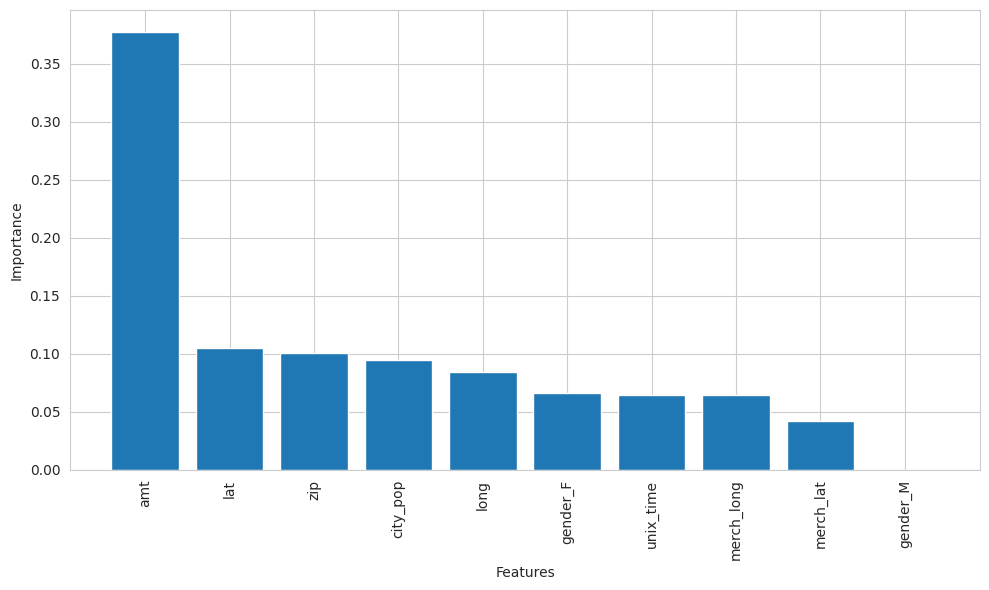

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df['feature'], feature_importances_df['importance'],)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [53]:
features

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,gender_F,gender_M
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,True,False
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,True,False
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,False,True
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,False,True
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,False,True
...,...,...,...,...,...,...,...,...,...,...
29995,4.80,27258,36.0424,-79.3242,6006,1326915862,36.440097,-79.589525,False,True
29996,2.01,69165,41.1558,-101.1360,1789,1326915881,40.312965,-101.664355,True,False
29997,36.52,26292,39.1505,-79.5030,836,1326915972,39.313899,-80.038231,True,False
29998,118.50,76951,31.8351,-101.0017,1143,1326916227,31.497897,-101.595871,True,False


## Feature Engineering

In [54]:
features

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,gender_F,gender_M
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,True,False
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,True,False
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,False,True
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,False,True
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,False,True
...,...,...,...,...,...,...,...,...,...,...
29995,4.80,27258,36.0424,-79.3242,6006,1326915862,36.440097,-79.589525,False,True
29996,2.01,69165,41.1558,-101.1360,1789,1326915881,40.312965,-101.664355,True,False
29997,36.52,26292,39.1505,-79.5030,836,1326915972,39.313899,-80.038231,True,False
29998,118.50,76951,31.8351,-101.0017,1143,1326916227,31.497897,-101.595871,True,False


In [55]:
features['category'] = df['category']
features['cc_num'] = df['cc_num']

df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])

features['year'] = df['trans_date_trans_time'].dt.year
features['month'] = df['trans_date_trans_time'].dt.month
features['day'] = df['trans_date_trans_time'].dt.day
features['hour'] = df['trans_date_trans_time'].dt.hour
features['minute'] = df['trans_date_trans_time'].dt.minute
features['second'] = df['trans_date_trans_time'].dt.second


In [56]:
features

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,gender_F,gender_M,category,cc_num,year,month,day,hour,minute,second
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,True,False,misc_net,2703186189652095,2019,1,1,0,0,18
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,True,False,grocery_pos,630423337322,2019,1,1,0,0,44
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,False,True,entertainment,38859492057661,2019,1,1,0,0,51
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,False,True,gas_transport,3534093764340240,2019,1,1,0,1,16
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,False,True,misc_pos,375534208663984,2019,1,1,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4.80,27258,36.0424,-79.3242,6006,1326915862,36.440097,-79.589525,False,True,food_dining,3525590521269779,2019,1,18,19,44,22
29996,2.01,69165,41.1558,-101.1360,1789,1326915881,40.312965,-101.664355,True,False,kids_pets,376445266762684,2019,1,18,19,44,41
29997,36.52,26292,39.1505,-79.5030,836,1326915972,39.313899,-80.038231,True,False,health_fitness,630424987505,2019,1,18,19,46,12
29998,118.50,76951,31.8351,-101.0017,1143,1326916227,31.497897,-101.595871,True,False,food_dining,3567527758368741,2019,1,18,19,50,27


In [57]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

encoder=LabelEncoder()
features['category']=encoder.fit_transform(features['category'])


In [58]:
features

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,gender_F,gender_M,category,cc_num,year,month,day,hour,minute,second
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,True,False,8,2703186189652095,2019,1,1,0,0,18
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,True,False,4,630423337322,2019,1,1,0,0,44
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,False,True,0,38859492057661,2019,1,1,0,0,51
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,False,True,2,3534093764340240,2019,1,1,0,1,16
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,False,True,9,375534208663984,2019,1,1,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4.80,27258,36.0424,-79.3242,6006,1326915862,36.440097,-79.589525,False,True,1,3525590521269779,2019,1,18,19,44,22
29996,2.01,69165,41.1558,-101.1360,1789,1326915881,40.312965,-101.664355,True,False,7,376445266762684,2019,1,18,19,44,41
29997,36.52,26292,39.1505,-79.5030,836,1326915972,39.313899,-80.038231,True,False,5,630424987505,2019,1,18,19,46,12
29998,118.50,76951,31.8351,-101.0017,1143,1326916227,31.497897,-101.595871,True,False,1,3567527758368741,2019,1,18,19,50,27


In [59]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [60]:
X_train

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,gender_F,gender_M,category,cc_num,year,month,day,hour,minute,second
21753,324.87,68881,41.4193,-99.3844,73,1326502012,41.603137,-99.129649,True,False,4,4979422371139333,2019,1,14,0,46,52
251,8.65,15449,39.9636,-79.7853,184,1325387459,39.064097,-79.342751,True,False,11,4658490815480264,2019,1,1,3,10,59
22941,123.61,10548,41.2496,-73.9446,3487,1326551762,41.448167,-74.580065,True,False,5,580954173374,2019,1,14,14,36,2
618,40.03,49613,44.5232,-86.2061,680,1325405058,44.580163,-85.781021,False,True,2,3547560454237873,2019,1,1,8,4,18
17090,29.41,54559,46.4959,-90.4383,795,1326259597,46.767972,-90.240271,False,True,9,180049032966888,2019,1,11,5,26,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,27.14,98233,48.4786,-122.3345,14871,1326904898,47.630168,-123.042494,True,False,12,4873783502705038,2019,1,18,16,41,38
5390,3.32,6024,42.0158,-73.2913,647,1325681650,41.646346,-73.179966,True,False,11,342952484382519,2019,1,4,12,54,10
860,74.15,99113,46.5901,-117.1692,761,1325415300,46.902305,-116.416710,True,False,2,4428154703770710,2019,1,1,10,55,0
15795,44.08,63010,38.4305,-90.3870,35439,1326174802,39.118069,-90.664144,False,True,3,3512365128314616,2019,1,10,5,53,22


In [61]:
xgboost_model = xgb.XGBClassifier(random_state=42)

evaluate_and_save_model(xgboost_model, X_train, X_test, y_train, y_test, "xgboost-featureEgineered.pkl")

Accuracy: XGBClassifier Accuracy:0.9980

Classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5943
           1       0.92      0.86      0.89        57

    accuracy                           1.00      6000
   macro avg       0.96      0.93      0.94      6000
weighted avg       1.00      1.00      1.00      6000

Model saved as xgboost-featureEgineered.pkl


In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
smote = SMOTE(random_state=42)

In [64]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [65]:
evaluate_and_save_model(xgboost_model, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")

Accuracy: XGBClassifier Accuracy:0.9977

Classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5943
           1       0.84      0.93      0.88        57

    accuracy                           1.00      6000
   macro avg       0.92      0.96      0.94      6000
weighted avg       1.00      1.00      1.00      6000

Model saved as xgboost-SMOTE.pkl


In [66]:
from sklearn.ensemble import VotingClassifier

In [67]:
voting_clf = VotingClassifier(estimators=[('xgboost', xgb.XGBClassifier(random_state=42)),
 ('rf', RandomForestClassifier(random_state=42)), ('svm', SVC(random_state=42, probability=True))],
 voting='hard'
 )

In [68]:
#evaluate_and_save_model(voting_clf, X_resampled, X_test, y_resampled, y_test, "voting_clf.pkl")

VotingClassifier with XGBClassifier, RandomForestClassifier and SVC, this we will take 18-19 minutes, results:

Accuracy: VotingClassifier Accuracy:0.9968

Classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5943
           1       0.78      0.93      0.85        57

    accuracy                           1.00      6000
   
   macro avg       0.89      0.96      0.92      6000

weighted avg       1.00      1.00      1.00      6000

=============
Model saved as voting_clf.pkl

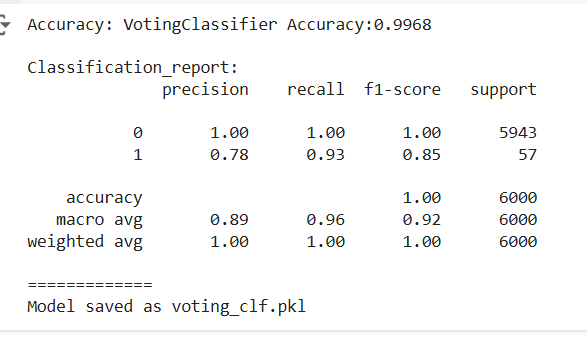

# Web App: Project 1 Customer Churn Prediction with Machine Learning

In [69]:
!pip install streamlit
!pip install groq
!pip install openai
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 16.8 MB/s eta 0:00:00


In [70]:
%%writefile utils.py

import plotly.graph_objects as go

def create_gauge_chart(probability):
  # Determine color based on churn probability
  if probability < 0.3:
    color = "green"
  elif probability < 0.6:
    color = "yellow"
  else:
    color = "red"

  # Create a gauge chart
  fig = go.Figure(go.Indicator(
      mode = "gauge+number",
      value = probability * 100,
      domain = {
          'x': [0, 1],
          'y': [0, 1]},
      title = {
          'text': "Churn Probability",
          'font': {
            'size': 24,
            'color': "white"}},
      number = {'font': {
                         'size': 48,
                         'color': "white"}},
      gauge = {'axis': {'range': [0, 100],
                        'tickwidth': 1,
                        'tickcolor': "white"},
               'bar': {
                   'color':color},
               'bgcolor': 'rgba(0,0,0,0)',
               'borderwidth': 2,
               'bordercolor': 'white',
               'steps': [
               {'range': [0, 30], 'color': 'rgba(0, 255, 0, 0.3)'},
               {'range': [30, 60], 'color': 'rgba(255, 255, 0, 0.3)'},
               {'range': [60, 100], 'color': 'rgba(255, 0, 0, 0.3)'}],
               'threshold': {
               'line': {
                   'color': "white",
                   'width': 4
                   },
               'thickness': 0.75,
               'value': 100
               }

            }))

  # Update chart layout
  fig.update_layout(
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    font={'color': "white"},
    width=400,
    height=300,
    margin=dict(l=20, r=20, t=50, b=20))


  return fig


def create_model_probability_chart(probabilities):
    models = list(probabilities.keys())
    probs = list(probabilities.values())

    fig = go.Figure(data=[
        go.Bar(y=models,
               x=probs,
               orientation='h',
               text=[f'{p:.2%}' for p in probs],
               textposition='auto')
    ])

    fig.update_layout(title='Churn Probability by Model',
                      yaxis_title='Models',
                      xaxis_title='Probability',
                      xaxis=dict(tickformat='0%', range=[0, 1]),
                      height=400,
                      margin=dict(l=20, r=20, t=40, b=20))

    return fig





Writing utils.py


In [71]:
#How to run Streamlit code in Google Colab:
#https://medium.com/@yash.kavaiya3/running-streamlit-code-in-google-colab-involves-a-few-steps-c43ea0e8c0d9

# Copy IP address
!wget -q -O - ipv4.icanhazip.com

34.16.183.87


In [72]:
%%writefile bonus_project_main.py
from google.colab import userdata
#userdata.get('GROQ_API_KEY')

import streamlit as st
import utils as ut

import streamlit as st
import pandas as pd
import pickle
import numpy as np
import os
from openai import OpenAI

#import streamlit as st
#import pandas as pd
#import pickle
#import numpy as np
#import os
#from openai import OpenAI

#st.title("Customer Churn Prediction")


#client=OpenAI(base_url='https://api.groq.com/openai/v1',
#              api_key=os.environ.get('GROQ_API_KEY'))

client=OpenAI(base_url='https://api.groq.com/openai/v1',
              api_key=userdata.get('GROQ_API_KEY'))



def load_model(filename):
  with open(filename,'rb') as file:
      return pickle.load(file)

xgboost_model=load_model('/content/xgb_model.pkl')
naive_bayes_model=load_model('/content/nb_model.pkl')
random_forest_model=load_model('/content/rf_model.pkl')
decision_tree_model=load_model('/content/dt_model.pkl')
svm_model=load_model('/content/svm_model.pkl') # with svm_model=SVC(random_state=42, probability=True)
knn_model=load_model('/content/knn_model.pkl')
#voting_classifier_model=load_model('/content/voting_clf.pkl')
xgboost_SMOTE_model=load_model('/content/xgboost-SMOTE.pkl')
xgboost_featureEgineered_model=load_model('/content/xgboost-featureEgineered.pkl')

# this is in plus algorithm for tutorial
gb_model=load_model('/content/gb_model.pkl')

def prepare_input(amt,lat, zip, city_pop, longg, gender, unix_time,merch_long,merch_lat):

  input_dict={
      'amt':amt,
      'lat':lat,
      'zip':int(zip),
      'city_pop':int(city_pop),
      'long':longg,
      'gender_M':1 if gender=='M' else 0,
      'gender_F':1 if gender=='F' else 0,
      'unix_time':int(unix_time),
      'merch_long':merch_long,
      'merch_lat':merch_lat
  }
  input_df=pd.DataFrame([input_dict])
  return input_df, input_dict


def make_prediction(input_df, input_dict):
    probabilities={'XGBoost':xgboost_model.predict_proba(input_df)[0][1],
                   'Random Forest':random_forest_model.predict_proba(input_df)[0][1],
                   'K-Nearest Neighbors':knn_model.predict_proba(input_df)[0][1],
                   'Support Vector Machine':svm_model.predict_proba(input_df)[0][1],
                   'Gradient Boosting':gb_model.predict_proba(input_df)[0][1],
                   #'Decision Tree':decision_tree_model.predict_proba(input_df)[0][1],
                   #'Naive Bays':naive_bayes_model.predict_proba(input_df)[0][1],


    }
    avg_probability=np.mean(list(probabilities.values()))

    st.markdown('## Model Probabilities')
    for model, prob in probabilities.items():
      st.write(f"{model} {prob}")
    st.write(f"Average Probability: {avg_probability}")

    col1, col2 = st.columns(2)

    with col1:
       fig = ut.create_gauge_chart(avg_probability)
       st.plotly_chart(fig, use_container_width=True)
       st.write(f"The customer has a {avg_probability:.2%} probability of fraud.")

    with col2:
       fig_probs = ut.create_model_probability_chart(probabilities)
       st.plotly_chart(fig_probs, use_container_width=True)

    return avg_probability


def explain_prediction(probability, input_dict, first, last):

  prompt=f"""You are expert data scientist at a bank for fraud detection, when you specialized interpreting and
  exploring predictions of machine learning models.
  Your machine learning has predicted that a customer named {first} {last} has a
  {round(probability*100, 1)}% probability of fraud, based on the information provided below.
  Here is the customer's information:
  {input_dict}

  Here are the machinen learning model's top 10 most important features for predicting fraud:

               Feature | Importance
  ---------------------------------------------
                   amt |	0.377321
                   lat |	0.105134
                   zip |	0.100778
              city_pop |	0.094403
                  long |	0.084427
              gender_F |	0.066545
             unix_time |	0.064587
            merch_long |	0.064324
             merch_lat |	0.042482
              gender_M |	0.000000


  {pd.set_option('display.max_columns', None)}

  Here are summary statistics for fraud custumers:
  {df[df['is_fraud']==1].describe()}

  Here are summary statistics for non-fraud custumers:
  {df[df['is_fraud']==0].describe()}

  - If the custumers has over a 40% risk of fraud, generate a 3 sentences
  explanation of why they are at risk of fraud.
  - If the custumers has less than a 40% risk of fraud, generate a 3 sentences
  explanation of why they are might not be at risk of fraud.
  - Your explanation should be based on custumer's information, the summary statistics
  of fraud and non-fraud customers, and the feature importances provided.

  Don't mention the probability churning, or the machine learning model, or say
  anything like 'Based on machine learning model's prediction and top 10 most important
  features', just explain the prediction.
  """
  print("EXPLAIN PROMPT", prompt)

  raw_response=client.chat.completions.create(
      model="llama-3.2-3b-preview",
      messages=[
          {"role":"user",
           "content":prompt
           }])

  return raw_response.choices[0].message.content

def generate_email(probability, input_dict, explanation,first,last):

  prompt=f"""You are a manager at HS Bank. You are responsible to send emails at
  customers from the bank if is a fraud or non-fraud transaction.

  Your noticed a customer named {first}{last} has a
  {round(probability*100, 1)}% probability of fraud.

  Here is the customer's information:
  {input_dict}

  Here is some explanation as to why the customer might be at risk of fraud:
  {explanation}

  Generate an email to the customer based on theri information, asking them to say
  if they are at the risk of fraud.

  Make sure to list out set of reasons if was safe transaction at bank or no,
  in bullet point format. Don't ever mention the probability of fraud, or
  the machine learning model to the customer.

  """
  print("\n\nEMAIL PROMPT", prompt)

  raw_response=client.chat.completions.create(
      model="llama-3.1-8b-instant",
      messages=[
          {"role":"user",
           "content":prompt
           }])

  return raw_response.choices[0].message.content


st.title("Credit Card Fraud Detection")

df=pd.read_csv('/content/fraudTrain.csv')[:30000]

customers=[f"{row['first']}-{row['last']}" for _, row in df.iterrows()]

selected_customer_option = st.selectbox("Select a customer:",customers)

if selected_customer_option:

  selected_first = selected_customer_option.split("-")[0]

  print("First name",selected_first)

  selected_last=selected_customer_option.split("-")[1]

  print("Last name",selected_last)

  selected_customer = df.loc[(df['first'] == selected_first) & (df['last'] == selected_last)].iloc[0]

  print("Selected Customer",selected_customer)

  col1,col2=st.columns(2)

  with col1:
    amt=st.number_input("Amount (amt)",
                        min_value=1.000000,max_value=11872.210000,
                        value=float(selected_customer['amt']))

    lat=st.number_input("Latitude (lat)",
                          min_value=20.027100	,max_value=65.689900,
                          value=float(selected_customer['lat']))

    zip=st.number_input("Zip code",
                        min_value=1257	,max_value=99783	,
                        value=int(selected_customer['zip']))

    city_pop=st.number_input("City Population",
                        min_value=23	, #max_value=2906700.000000	,
                        value=int(selected_customer['city_pop']))

    longg=st.number_input("Longitute (long)",
                     min_value=-165.672300	,max_value=-67.950300	,
                     value=float(selected_customer['long']))

    gender=st.radio("Gender",["Male","Female"],
                   index=0 if selected_customer['gender']=='M' else 1 )




  with col2:
    unix_time=st.number_input("Unix time",
                        min_value=1325376018	,max_value=1326916316 ,
                        value=int(selected_customer['unix_time']))

    merch_long=st.number_input("Merch longitute (merch_long)",
                     min_value=-166.629875		,max_value=-66.967742	,
                     value=float(selected_customer['merch_long']))

    merch_lat=st.number_input("Merch latitude (merch_lat)",
                          min_value=19.040141	,max_value=66.659242	,
                          value=float(selected_customer['merch_lat']))



input_df,input_dict=prepare_input(amt,lat, zip, city_pop, longg, gender,
                                  unix_time,merch_long,merch_lat)

avg_probability=make_prediction(input_df,input_dict)

explanation=explain_prediction(avg_probability,input_dict,
                    selected_customer['first'], selected_customer['last'])

st.markdown("===")
st.subheader("Explanation of Prediction")
st.markdown(explanation)


email=generate_email(avg_probability,input_dict,explanation,
                    selected_customer['first'], selected_customer['last'])

st.markdown("===")
st.subheader("Personalized Email")
st.markdown(email)



Writing bonus_project_main.py


In [73]:
!streamlit run /content/bonus_project_main.py & npx localtunnel --port 8501



Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.183.87:8501

  Stopping...
^C
